# 第一部分　分类

## 第1章　机器学习基础

### 1.1 　何谓机器学习
#### 1.1.1 　传感器和海量数据
#### 1.1.2 　机器学习非常重要
### 1.2 　关键术语
### 1.3 　机器学习的主要任务
### 1.4 　如何选择合适的算法
### 1.5 　开发机器学习应用程序的步骤
### 1.6 　Python语言的优势
#### 1.6.1 　可执行伪代码
#### 1.6.2 　Python比较流行
#### 1.6.3 　Python语言的特色
#### 1.6.4 　Python语言的缺点
### 1.7 　NumPy函数库基础
### 1.8 　本章小结

## 第2章　k-近邻算法

### 2.1 　k-近邻算法概述
#### 2.1.1 　准备：使用Python导入数据
#### 2.1.2 　从文本文件中解析数据
#### 2.1.3 　如何测试分类器
### 2.2 　示例：使用k-近邻算法改进约会网站的配对效果
#### 2.2.1 　准备数据：从文本文件中解析数据
#### 2.2.2 　分析数据：使用Matplotlib创建散点图
#### 2.2.3 　准备数据：归一化数值
#### 2.2.4 　测试算法：作为完整程序验证分类器
#### 2.2.5 　使用算法：构建完整可用系统
### 2.3 　示例：手写识别系统
#### 2.3.1 　准备数据：将图像转换为测试向量
#### 2.3.2 　测试算法：使用k-近邻算法识别手写数字
### 2.4 　本章小结

## 第3章　决策树

### 3.1 　决策树的构造
#### 3.1.1 　信息增益
#### 3.1.2 　划分数据集
#### 3.1.3 　递归构建决策树
### 3.2 　在Python中使用Matplotlib注解绘制树形图
#### 3.2.1 　Matplotlib注解
#### 3.2.2 　构造注解树
### 3.3 　测试和存储分类器
#### 3.3.1 　测试算法：使用决策树执行分类
#### 3.3.2 　使用算法：决策树的存储
### 3.4 　示例：使用决策树预测隐形眼镜类型
### 3.5 　本章小结

## 第4章　基于概率论的分类方法：朴素贝叶斯

### 4.1 　基于贝叶斯决策理论的分类方法
### 4.2 　条件概率
### 4.3 　使用条件概率来分类
### 4.4 　使用朴素贝叶斯进行文档分类
### 4.5 　使用Python进行文本分类
#### 4.5.1 　准备数据：从文本中构建词向量
#### 4.5.2 　训练算法：从词向量计算概率
#### 4.5.3 　测试算法：根据现实情况修改分类器
#### 4.5.4 　准备数据：文档词袋模型
### 4.6 　示例：使用朴素贝叶斯过滤垃圾邮件
#### 4.6.1 　准备数据：切分文本
#### 4.6.2 　测试算法：使用朴素贝叶斯进行交叉验证
### 4.7 　示例：使用朴素贝叶斯分类器从个人广告中获取区域倾向
#### 4.7.1 　收集数据：导入RSS源
#### 4.7.2 　分析数据：显示地域相关的用词
### 4.8 　本章小结

## 第5章　Logistic回归

在这一节我们将首次接触最优化问题和算法。

### 5.1 　基于Logistic回归和Sigmoid函数的分类

对于二分类问题，通常使用 **海维塞德阶跃函数**（Heaviside step function）作为预测函数，也称为 **单位阶跃函数**，但是该函数在跳跃点上从 0 瞬间跳跃到 1，不是一个连续函数，所以使用 **Sigmoid 函数** 来近似：

$$
\delta(z) = \frac{1}{1 + e^{-z}}
$$

### 5.2 　基于最优化方法的最佳回归系数确定

#### 5.2.1 　梯度上升法

梯度算法的迭代公式：

$$
w := w + \alpha \nabla_w f(w)
$$

梯度上升法用来求函数的最大值，梯度下降法用来求函数的最小值。

准备如下数据集，并通过梯度上升法求解 Logistic 回归：

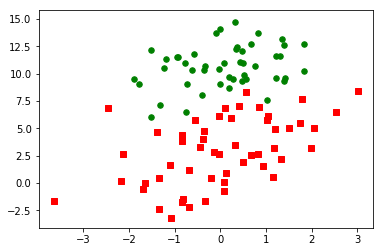

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# 加载数据集
def loadDataSet(dataPath):
    dataMat = []
    labelMat = []
    fr = open(dataPath)
    for line in fr.readlines():
        lineArr = line.strip().split()
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
        labelMat.append(int(lineArr[2]))
    return dataMat, labelMat

# 画散点图
def plotDataSet(dataMat, labelMat):
    dataArr = np.array(dataMat)
    n = np.shape(dataArr)[0]
    xcord1 = []
    ycord1 = []
    xcord2 = []
    ycord2 = []
    for i in range(n):
        if int(labelMat[i]) == 1:
            xcord1.append(dataArr[i, 1])
            ycord1.append(dataArr[i, 2])
        else:
            xcord2.append(dataArr[i, 1])
            ycord2.append(dataArr[i, 2])
            
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
    ax.scatter(xcord2, ycord2, s=30, c='green')
    plt.show()

dataMat, labelMat = loadDataSet('./data/1.txt')
plotDataSet(dataMat, labelMat)

#### 5.2.2 　训练算法：使用梯度上升找到最佳参数

In [7]:
def sigmoid(inX):
    return 1.0 / (1 + np.exp(-inX))

def gradAscent(dataMatIn, classLabels):
    dataMatrix = np.mat(dataMatIn)
    labelMat = np.mat(classLabels).transpose()
    m, n = np.shape(dataMatrix)
    alpha = 0.001
    maxCycles = 200
    weights = np.ones((n, 1))
    for k in range(maxCycles):
        h = sigmoid(dataMatrix * weights)
        error = (labelMat - h)
        weights = weights + alpha * dataMatrix.transpose() * error
    return weights

weights = gradAscent(dataMat, labelMat)
print(weights)

[[ 2.77955136]
 [ 0.36268202]
 [-0.44923697]]


#### 5.2.3 　分析数据：画出决策边界

在 Sigmoid 函数 $\delta(z) = \frac{1}{1 + e^{-z}}$ 中，当 $z=0$ 时，$\delta(z)=0.5$ 为决策边界。所以我们令：

$$
w_0 + w_1 x + w_2 y = 0
$$

这就是 Logistic 回归的决策边界：

$$
y = \frac{-w_0 - w_1 x}{w_2}
$$

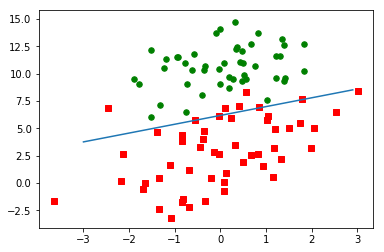

In [8]:
# 画散点图和分界线
def plotBestFit(dataMat, labelMat, weights):
    dataArr = np.array(dataMat)
    n = np.shape(dataArr)[0]
    xcord1 = []
    ycord1 = []
    xcord2 = []
    ycord2 = []
    for i in range(n):
        if int(labelMat[i]) == 1:
            xcord1.append(dataArr[i, 1])
            ycord1.append(dataArr[i, 2])
        else:
            xcord2.append(dataArr[i, 1])
            ycord2.append(dataArr[i, 2])
            
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
    ax.scatter(xcord2, ycord2, s=30, c='green')
    
    # 决策边界
    x = np.arange(-3.0, 3.0, 0.1)
    y = (-weights[0,0]-weights[1,0]*x)/weights[2,0]
    ax.plot(x, y)
    
    plt.show()
    
plotBestFit(dataMat, labelMat, weights)

#### 5.2.4 　训练算法：随机梯度上升

上面的算法需要大量的计算，它在每次更新回归系数时都需要遍历整个数据集，可以改进为一次只用一个样本来更新回归系数，这被称为 **随机梯度上升算法**。由于可以在新样本到来时对分类器进行增量式更新，所以它也是一种 **在线学习算法**，于此相对应，一次处理所有数据的算法被称为 **批处理**。

In [9]:
def stocGradAscent0(dataMatIn, classLabels):
    dataMatrix = np.array(dataMatIn)
    m, n = np.shape(dataMatrix)
    alpha = 0.001
    weights = np.ones(n)
    for i in range(m):
        h = sigmoid(np.sum(dataMatrix[i] * weights))
        error = (labelMat[i] - h)
        weights = weights + alpha * error * dataMatrix[i]
    return weights

weights = stocGradAscent0(dataMat, labelMat)
print(weights)

[0.963951   0.9826866  0.49153886]


随机梯度上升算法和梯度上升算法在代码上很相似，但也有一些区别：第一，梯度上升算法中 h 和 error 是向量，而随机梯度上升算法中是数值；第二，随机梯度上升算法中没有矩阵的转换过程。

画出分界线，可以看出随机梯度上升的拟合效果没有上面的梯度上升算法完美，但是，这并不能表示这种算法不好，判断优化算法优劣的一个方法是看它是否收敛，可以在数据集上多运行几次，看参数是否达到一个稳定值。

针对上面的随机梯度上升算法，还可以进行一些改进：

* alpha 每次迭代时需要调整：alpha = 4/(1.0+i+j)+0.01
* 随机选择样本来更新回归系数

这样可以缓解参数收敛的数据波动。

### 5.3 　示例：从疝气病症预测病马的死亡率
#### 5.3.1 　准备数据：处理数据中的缺失值
#### 5.3.2 　测试算法：用Logistic回归进行分类
### 5.4 　本章小结

## 第6章　支持向量机

### 6.1 　基于最大间隔分隔数据
### 6.2 　寻找最大间隔
#### 6.2.1 　分类器求解的优化问题
#### 6.2.2 　SVM应用的一般框架
### 6.3 　SMO高效优化算法
#### 6.3.1 　Platt的SMO算法
#### 6.3.2 　应用简化版SMO算法处理小规模数据集
### 6.4 　利用完整Platt SMO算法加速优化
### 6.5 　在复杂数据上应用核函数
#### 6.5.1 　利用核函数将数据映射到高维空间
#### 6.5.2 　径向基核函数
#### 6.5.3 　在测试中使用核函数
### 6.6 　示例：手写识别问题回顾
### 6.7 　本章小结

## 第7章　利用AdaBoost元算法提高分类性能

### 7.1 　基于数据集多重抽样的分类器
#### 7.1.1 　bagging：基于数据随机重抽样的分类器构建方法
#### 7.1.2 　boosting
### 7.2 　训练算法：基于错误提升分类器的性能
### 7.3 　基于单层决策树构建弱分类器
### 7.4 　完整AdaBoost算法的实现
### 7.5 　测试算法：基于AdaBoost的分类
### 7.6 　示例：在一个难数据集上应用AdaBoost
### 7.7 　非均衡分类问题
#### 7.7.1 　其他分类性能度量指标：正确率、召回率及ROC曲线
#### 7.7.2 　基于代价函数的分类器决策控制
#### 7.7.3 　处理非均衡问题的数据抽样方法
### 7.8 　本章小结

# 第二部分　利用回归预测数值型数据

## 第8章　预测数值型数据：回归

### 8.1 　用线性回归找到最佳拟合直线
### 8.2 　局部加权线性回归
### 8.3 　示例：预测鲍鱼的年龄
### 8.4 　缩减系数来“理解”数据
#### 8.4.1 　岭回归
#### 8.4.2 　lasso
#### 8.4.3 　前向逐步回归
### 8.5 　权衡偏差与方差
### 8.6 　示例：预测乐高玩具套装的价格
#### 8.6.1 　收集数据：使用Google购物的API
#### 8.6.2 　训练算法：建立模型
### 8.7 　本章小结

## 第9章　树回归

### 9.1 　复杂数据的局部性建模
### 9.2 　连续和离散型特征的树的构建
### 9.3 　将CART算法用于回归
#### 9.3.1 　构建树
#### 9.3.2 　运行代码
### 9.4 　树剪枝
#### 9.4.1 　预剪枝
#### 9.4.2 　后剪枝
### 9.5 　模型树
### 9.6 　示例：树回归与标准回归的比较
### 9.7 　使用Python的Tkinter库创建GUI
#### 9.7.1 　用Tkinter创建GUI
#### 9.7.2 　集成Matplotlib和Tkinter
### 9.8 　本章小结

# 第三部分　无监督学习

## 第10章　利用K-均值聚类算法对未标注数据分组

### 10.1 　K-均值聚类算法
### 10.2 　使用后处理来提高聚类性能
### 10.3 　二分K-均值算法
### 10.4 　示例：对地图上的点进行聚类
#### 10.4.1 　Yahoo! PlaceFinder API
#### 10.4.2 　对地理坐标进行聚类
### 10.5 　本章小结

## 第11章　使用Apriori算法进行关联分析

### 11.1 　关联分析
### 11.2 　Apriori原理
### 11.3 　使用Apriori算法来发现频繁集
#### 11.3.1 　生成候选项集
#### 11.3.2 　组织完整的Apriori算法
### 11.4 　从频繁项集中挖掘关联规则
### 11.5 　示例：发现国会投票中的模式
#### 11.5.1 　收集数据：构建美国国会投票记录的事务数据集
#### 11.5.2 　测试算法：基于美国国会投票记录挖掘关联规则
### 11.6 　示例：发现毒蘑菇的相似特征
### 11.7 　本章小结

## 第12章　使用FP-growth算法来高效发现频繁项集

### 12.1 　FP树：用于编码数据集的有效方式
### 12.2 　构建FP树
#### 12.2.1 　创建FP树的数据结构
#### 12.2.2 　构建FP树
### 12.3 　从一棵FP树中挖掘频繁项集
#### 12.3.1 　抽取条件模式基
#### 12.3.2 　创建条件FP树
### 12.4 　示例：在Twitter源中发现一些共现词
### 12.5 　示例：从新闻网站点击流中挖掘
### 12.6 　本章小结

# 第四部分　其他工具

## 第13章　利用PCA来简化数据

### 13.1 　降维技术
### 13.2 　PCA
#### 13.2.1 　移动坐标轴
#### 13.2.2 　在NumPy中实现PCA
### 13.3 　示例：利用PCA对半导体制造数据降维
### 13.4 　本章小结

## 第14章　利用SVD简化数据

### 14.1 　SVD的应用
#### 14.1.1 　隐性语义索引
#### 14.1.2 　推荐系统
### 14.2 　矩阵分解
### 14.3 　利用Python实现SVD
### 14.4 　基于协同过滤的推荐引擎
#### 14.4.1 　相似度计算
#### 14.4.2 　基于物品的相似度还是基于用户的相似度？
#### 14.4.3 　推荐引擎的评价
### 14.5 　示例：餐馆菜肴推荐引擎
#### 14.5.1 　推荐未尝过的菜肴
#### 14.5.2 　利用SVD提高推荐的效果
#### 14.5.3 　构建推荐引擎面临的挑战
### 14.6 　基于SVD的图像压缩
### 14.7 　本章小结

## 第15章　大数据与MapReduce

### 15.1 　MapReduce：分布式计算的框架
### 15.2 　Hadoop流
#### 15.2.1 　分布式计算均值和方差的mapper
#### 15.2.2 　分布式计算均值和方差的reducer
### 15.3 　在Amazon网络服务上运行Hadoop程序
#### 15.3.1 　AWS上的可用服务
#### 15.3.2 　开启Amazon网络服务之旅
#### 15.3.3 　在EMR上运行Hadoop作业
### 15.4 　MapReduce上的机器学习
### 15.5 　在Python中使用mrjob来自动化MapReduce
#### 15.5.1 　mrjob与EMR的无缝集成
#### 15.5.2 　mrjob的一个MapReduce脚本剖析
### 15.6 　示例：分布式SVM的Pegasos算法
#### 15.6.1 　Pegasos算法
#### 15.6.2 　训练算法：用mrjob实现MapReduce版本的SVM
### 15.7 　你真的需要MapReduce吗？
### 15.8 　本章小结

## 附录A 　Python入门

## 附录B 　线性代数

## 附录C 　概率论复习

## 附录D 　资源